In [1]:
import pandas as pd
import glob
import scipy.optimize as opt 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
path = r'/Users/simoneazeglio/MalmoPlatform/Python_Examples/Econofisica/Project/logs/' # use your path
all_files = glob.glob(path + "/*.csv")

In [3]:
all_files[0]

'/Users/simoneazeglio/MalmoPlatform/Python_Examples/Econofisica/Project/logs/log_genetic_saved.csv'

In [4]:
gen = pd.read_csv(all_files[0], index_col=None, names=["Trial", "Moves", "Fitness" ])

In [5]:
gen = gen[gen.Trial != 0]

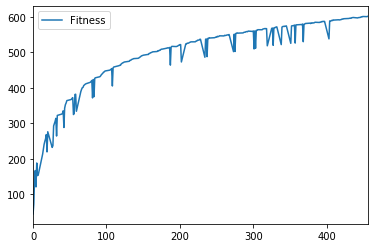

In [6]:
genplt = gen.plot(y='Fitness', use_index=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


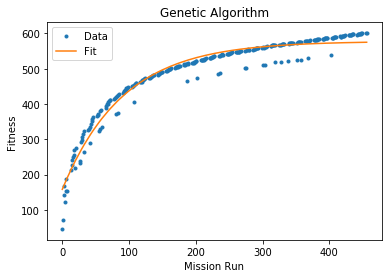

[5.77986994e+02 7.26287014e-01 1.09536609e-02]
[[ 6.03198147e+00 -5.19675577e-03 -5.69580589e-04]
 [-5.19675577e-03  8.85476012e-05  1.76186958e-06]
 [-5.69580589e-04  1.76186958e-06  9.46568909e-08]]


In [29]:
# This is the function we are trying to fit to the data.
def func(x, a, b, c):
     return a*(1-b*np.exp(-c*x))
    
xDataGen = gen.index.values
yDataGen = gen.Fitness.values

# Plot the actual data
plt.plot(xDataGen, yDataGen, ".", label="Data");
plt.errorbar(xDataGen, yDataGen, xerr=0.0, yerr=2.0, fmt = 'None')

# The actual curve fitting happens here
optimizedParameters, pcov = opt.curve_fit(func, xDataGen, yDataGen, p0=[10 , 5, 4]);

# Use the optimized parameters to plot the best fit
plt.plot(xDataGen, func(xDataGen, *optimizedParameters), label="Fit");

# Show the graph
plt.legend()
plt.xlabel("Mission Run")
plt.ylabel("Fitness")
plt.title("Genetic Algorithm")
plt.savefig('images/GeneticFitnessFit.png')
plt.show()
print(optimizedParameters)
print(pcov)


In [16]:
gen.Fitness.mean()

492.1796353859543

In [17]:
gen.Fitness.std()

108.74272952291332

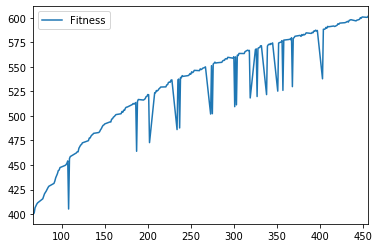

In [18]:
gen[gen.Fitness > 400].plot(y='Fitness')

In [10]:
all_files[1] #corretto aggiungendo i punti 

'/Users/simoneazeglio/MalmoPlatform/Python_Examples/Econofisica/Project/logs/log_hillclimb_saved.csv'

In [11]:
hillC = pd.read_csv(all_files[1], index_col=None, names=["Trial", "Moves", "Fitness" ])

hillC = hillC[hillC.Trial != 0]


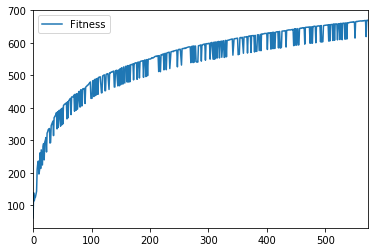

In [12]:
hillCplt = hillC.plot(y='Fitness', use_index=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


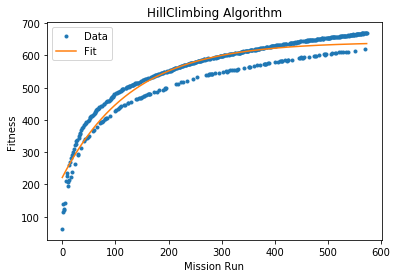

[6.41859489e+02 6.54548817e-01 7.70291675e-03]
[[ 7.54869105e+00 -5.40316557e-03 -4.94690695e-04]
 [-5.40316557e-03  7.04487131e-05  1.13454073e-06]
 [-4.94690695e-04  1.13454073e-06  5.07554687e-08]]


In [30]:
# This is the function we are trying to fit to the data.
def func(x, a, b, c):
     return a*(1-b*np.exp(-c*x))
    
xData = hillC.index.values
yData = hillC.Fitness.values

yerr = 2.0
# Plot the actual data
plt.plot(xData, yData, ".", label="Data");
plt.errorbar(xData, yData, xerr=0.0, yerr=2.0, fmt = 'None')

# The actual curve fitting happens here
optimizedParameters, pcov = opt.curve_fit(func, xData, yData, p0=[10 , 5, 4]);

# Use the optimized parameters to plot the best fit
plt.plot(xData, func(xData, *optimizedParameters), label="Fit");

# Show the graph
plt.legend()
plt.title("HillClimbing Algorithm")
plt.xlabel("Mission Run")
plt.ylabel("Fitness")
plt.savefig('images/HillclimbingFitnessFit.png')
plt.show()
print(optimizedParameters)
print(pcov)

In [17]:
hillC.Fitness.mean()

548.9882069988441

In [18]:
hillC.Fitness.std()

108.91919178325409

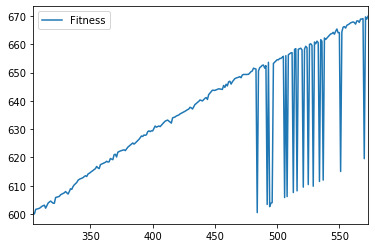

In [21]:
hillC[hillC.Fitness > 600].plot(y='Fitness')